# BÀI THỰC HÀNH 
**NHÓM 2**

**Thành viên:**
+ Hoàng Việt Anh - 2121050219
+ Quàng Thị Minh Hải - 2121050845
+ Nguyễn Văn Tuấn Anh - 2121051380

**Phân công nhiệm vụ:**
- Hoàng Việt Anh: Kiểm tra, xử lý thuộc tính "Purchase Date", "Product Category", vẽ biểu đồ số 7, 8, 9
- Quàng Thị Minh Hải: Kiểm tra xử lý thuộc tính "Age", "Gender", vẽ biểu đồ số 1, 2, 3
- Nguyễn Văn Tuấn Anh: Kiểm tra xử lý thuộc tính "Country", "Purchase Amount", vẽ biểu đồ số 4, 5, 6


**Mô tả tập dữ liệu:**

Bộ dữ liệu này chứa thông tin chi tiết về giao dịch của người dùng, bao gồm thông tin nhân khẩu học và hành vi mua hàng của họ. Nó có thông tin như ID người dùng, Độ tuổi, Giới tính, Quốc gia, Số tiền mua hàng, Ngày mua hàng và Danh mục sản phẩm. Dữ liệu này có thể hữu ích để phân tích xu hướng người tiêu dùng, ảnh hưởng nhân khẩu học đến hành vi mua hàng và phân khúc thị trường. 

1. ID người dùng: Mã định danh duy nhất được cấp cho mỗi người dùng để theo dõi giao dịch của họ.
2. Age: Độ tuổi của người dùng tại thời điểm mua hàng, điều này có thể ảnh hưởng đến hành vi mua hàng.
3. Gender: Giới tính của người dùng, cho phép phân khúc nhân khẩu học về mô hình mua hàng.
4. Country: Quốc gia cư trú của người dùng, hữu ích cho việc phân tích thị trường khu vực.
5. Purchase Amount: Tổng số tiền người dùng chi tiêu trong một giao dịch.
6. Purchase Date: Ngày thực hiện giao dịch mua, cho phép phân tích hành vi mua hàng theo thời gian.
7. Product Category: Danh mục sản phẩm được mua, giúp hiểu rõ sở thích của người tiêu dùng.

---
Nguồn: https://www.kaggle.com/datasets/refiaozturk/online-shopping-dataset

## I. ĐỌC DỮ LIỆU

In [97]:
#Nhập thư viện 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Đọc file dữ liệu
df_shopping = pd.read_csv('data/dataset.csv')

In [98]:
#Hiển thị thông tin biến
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           15000 non-null  int64  
 1   Age               13500 non-null  float64
 2   Gender            14250 non-null  object 
 3   Country           13800 non-null  object 
 4   Purchase Amount   13200 non-null  float64
 5   Purchase Date     13950 non-null  object 
 6   Product Category  14100 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [99]:
#Hiển thị dữ liệu thuộc tính số
df_shopping.describe()

,User ID,Age,Purchase Amount
count,15000.000000,13500.000000,13200.000000
mean,7500.500000,43.396000,253.217720
std,4330.271354,14.927082,143.113919
min,1.000000,18.000000,5.050000
25%,3750.750000,31.000000,130.335000
50%,7500.500000,43.000000,253.645000
75%,11250.250000,56.000000,378.585000
max,15000.000000,69.000000,499.950000


In [100]:
#Hiển thị dữ liệu thuộc tính Object
df_shopping.describe(include="O")

,Gender,Country,Purchase Date,Product Category
count,14250,13800,13950,14100
unique,3,6,1460,6
top,Female,France,2022-04-28,Clothing
freq,4818,2444,26,2444


In [101]:
#Hiển thị 5 bản ghi đầu tiên
df_shopping.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


## II. KIỂM TRA DỮ LIỆU

### Kiểm tra tổng quát

In [102]:
#Kiểm tra dữ liệu bị thiếu
df_shopping.isnull().sum()

User ID                0
Age                 1500
Gender               750
Country             1200
Purchase Amount     1800
Purchase Date       1050
Product Category     900
dtype: int64

In [103]:
#Kiểm tra dữ liệu trùng lặp
df_shopping.duplicated(keep=False).sum()

0

### Kiểm tra thuộc tính Age

In [104]:
# hiển thị các thông tin cơ bản
print(df_shopping['Age'].describe())

count    13500.000000
mean        43.396000
std         14.927082
min         18.000000
25%         31.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: Age, dtype: float64


In [105]:
# in ra các giá trị còn thiếu
print(df_shopping['Age'].isnull().sum())

1500


In [106]:
# hiển thị các dòng bị thiếu trong cột
df_shopping[df_shopping['Age'].isnull()]

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
5,6,NaN,Male,France,NaN,2021-12-27,Beauty
15,16,NaN,Female,Canada,490.22,NaN,Sports
17,18,NaN,Female,UK,495.25,2021-07-08,Beauty
21,22,NaN,Female,Australia,374.34,2021-07-27,Clothing
33,34,NaN,Other,USA,417.44,NaN,Beauty
...,...,...,...,...,...,...,...
14952,14953,NaN,Female,NaN,433.08,2022-07-24,Sports
14965,14966,NaN,Male,Australia,274.10,2020-10-18,Books
14972,14973,NaN,Female,Canada,168.48,2020-12-30,Books
14994,14995,NaN,Female,France,414.07,2023-06-19,Beauty


### Kiểm tra thuộc tính Gender

In [107]:
#kiểm tra thuộc tính gender
df_shopping['Gender'].unique()

array(['Female', 'Male', nan, 'Other'], dtype=object)

In [108]:
#thống kê số lượng theo nhóm
df_shopping['Gender'].value_counts()

Gender
Female    4818
Other     4742
Male      4690
Name: count, dtype: int64

### Kiểm tra thuộc tính Country           

In [109]:
#kiểm tra Country
df_shopping['Country'].unique()

array(['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada', nan],
      dtype=object)

In [110]:
#thống kê nhóm theo của Country
df_shopping['Country'].value_counts()

Country
France       2444
Germany      2330
Canada       2279
UK           2261
Australia    2256
USA          2230
Name: count, dtype: int64

### Kiểm tra thuộc tính Purchase Amount

In [111]:
#kiểm tra Purchase Amount
df_shopping['Purchase Amount'].unique()

array([331.79, 335.72, 493.18, ...,  27.73, 108.57, 105.57])

In [112]:
#Kiểm tra dữ liệu bị thiếu
df_shopping["Purchase Amount"].isnull().sum()

1800

In [113]:
#Kiểm tra kiểu dữ liệu của cột Purchase Amount
print(df_shopping["Purchase Amount"].dtype)

float64


### Kiểm tra thuộc tính Purchase Date

In [114]:
#Kiểm tra dữ liệu bị thiếu
df_shopping["Purchase Date"].isnull().sum()

1050

In [115]:
#Kiểm tra kiểu dữ liệu của cột Purchase Date
print(df_shopping["Purchase Date"].dtype)

object


In [116]:
#Hiển thị 5 dòng đầu của cột Purchase Date
df_shopping["Purchase Date"].head()

0    2021-11-21
1    2022-03-05
2           NaN
3    2023-06-08
4           NaN
Name: Purchase Date, dtype: object

### Kiểm tra thuộc tính Product Category

In [117]:
#Kiểm tra dữ liệu bị thiếu
df_shopping["Product Category"].isnull().sum()

900

In [118]:
#Các giá trị của cột Purchase Category
df_shopping["Product Category"].unique()

array(['Sports', 'Home & Kitchen', 'Books', 'Beauty', 'Clothing', nan,
       'Electronics'], dtype=object)

In [119]:
#Tổng số lượng các giá trị của cột Purchase Category
df_shopping["Product Category"].value_counts()

Product Category
Clothing          2444
Sports            2363
Home & Kitchen    2359
Electronics       2333
Books             2317
Beauty            2284
Name: count, dtype: int64

## III. XỬ LÝ DỮ LIỆU

### Xử lý thuộc tính Age               

In [120]:
#Điền giá trị thiếu bằng giá trịtrung bình
df_shopping['Age'] = df_shopping['Age'].fillna(df_shopping['Age'].mean())

### Xử lý thuộc tính Gender            

In [121]:
# vì giá trị thiếu ít -> xóa luôn
df_shopping = df_shopping.dropna(subset=['Gender'])

### Xử lý thuộc tính Country           

In [122]:
# xóa hàng có giá trị thiếu
df_shopping['Country'].dropna(inplace=True)

### Xử lý thuộc tính Purchase Amount

In [123]:
#Thay thế giá trị thiếu bằng giá trị xuất hiện nhìu nhất
# df_shopping['Purchase Amount'] = df_shopping['Purchase Amount'].fillna(df_shopping['Purchase Amount'].mode()[0])

In [124]:
#Thay thế giá trị bị thiếu bằng giá trị trung bình
df_shopping['Purchase Amount'] = df_shopping['Purchase Amount'].fillna(df_shopping['Purchase Amount'].mean())

### Xử lý thuộc tính Purchase Date

In [125]:
#Chuyển cột Purchase Date sang dạng datetime
df_shopping["Purchase Date"] = pd.to_datetime(df_shopping["Purchase Date"])

In [126]:
#Xoá các dòng bị thiếu dữ liệu trong cột Purchase Date
df_shopping.dropna(subset=["Purchase Date"],inplace=True)

In [127]:
#Hiển thị giá trị của cột Purchase Date
df_shopping["Purchase Date"]

0       2021-11-21
1       2022-03-05
3       2023-06-08
5       2021-12-27
6       2022-02-23
           ...    
14995   2023-08-20
14996   2021-07-23
14997   2022-02-21
14998   2022-08-25
14999   2020-05-28
Name: Purchase Date, Length: 13248, dtype: datetime64[ns]

### Xử lý thuộc tính Product Category

In [128]:
#Xoá các dòng bị thiếu dữ liệu trong cột Product Category
df_shopping.dropna(subset=["Product Category"],inplace=True)

In [129]:
df_shopping["Product Category"]

0                Sports
1        Home & Kitchen
3                Sports
5                Beauty
6                Beauty
              ...      
14995          Clothing
14996    Home & Kitchen
14997            Beauty
14998             Books
14999            Sports
Name: Product Category, Length: 12460, dtype: object

Kiểm tra cuối 

In [130]:
df_shopping.isnull().sum()

User ID               0
Age                   0
Gender                0
Country             997
Purchase Amount       0
Purchase Date         0
Product Category      0
dtype: int64

## IV.TRỰC QUAN HOÁ DỮ LIỆU

### Biểu đồ 1: Age x Purchase Amount- Thống kê số tiền người dùng chi tiêu theo độ tuổi

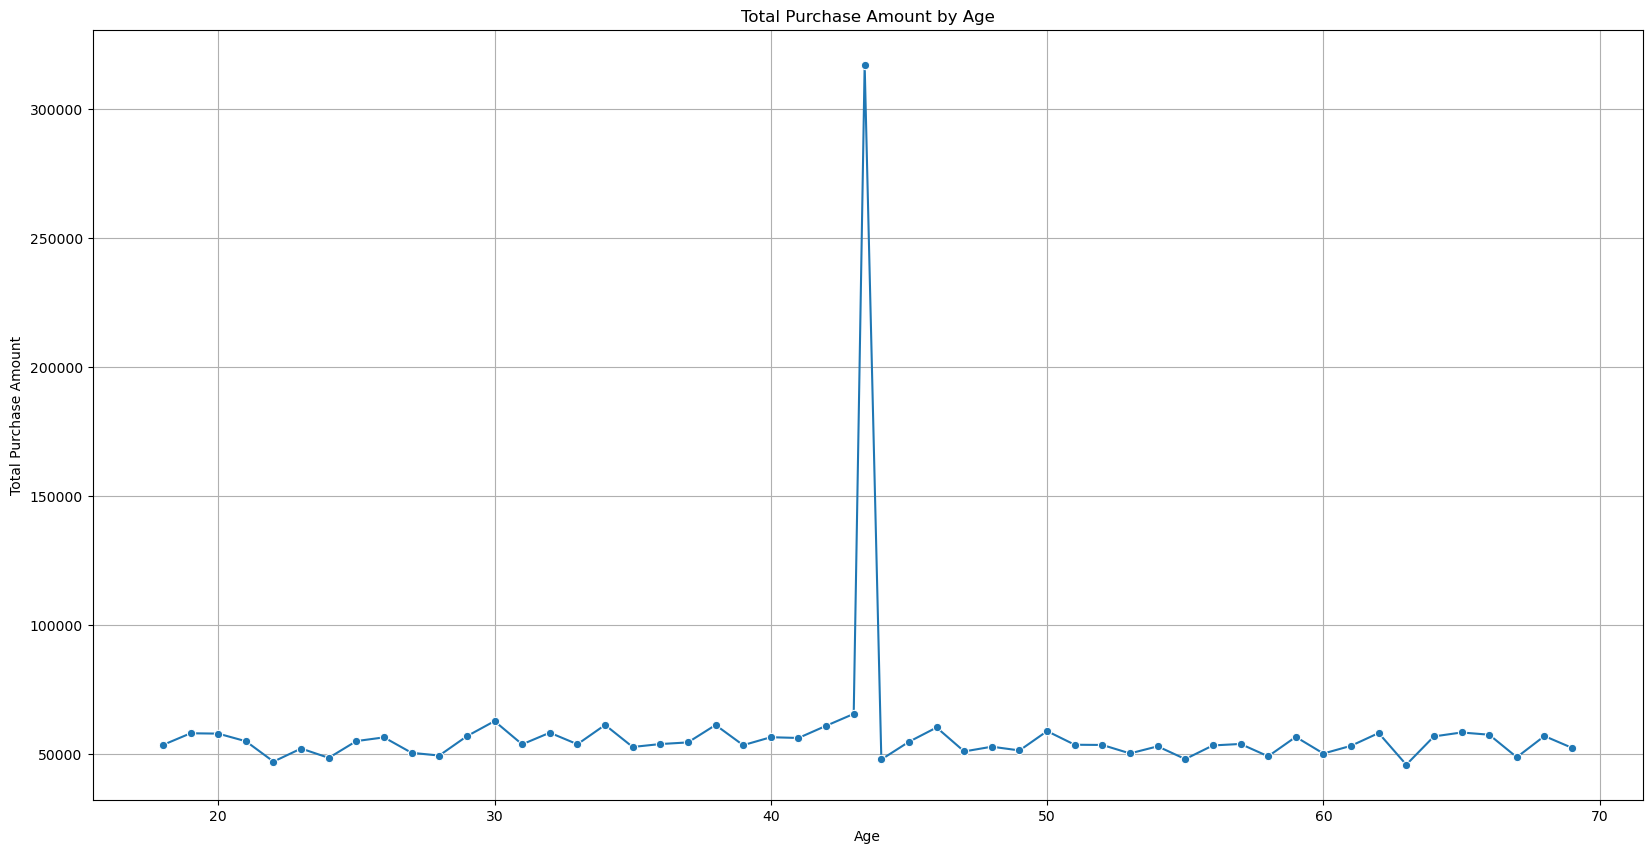

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# nhóm dữ liệu theo độ tuổi và tính tổng
age_purchase = df_shopping.groupby('Age')['Purchase Amount'].sum() 
age_purchase = age_purchase.reset_index()

# vẽ biểu đồ đường 
plt.figure(figsize=(20, 10))
sns.lineplot(data=age_purchase, x='Age', y='Purchase Amount', marker='o')
plt.title('Total Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')
plt.grid(True)

plt.show()





- Không có xu hướng rõ ràng theo tuổi: Các nhóm tuổi khác nhau chi tiêu không đồng đều.

- Những độ tuổi có mức chi tiêu cao: độ tuổi gần 18-20, 28-35 và khoảng 40-52,...

- Những độ tuổi chi tiêu thấp: độ tuổi từ 21-30 và khoảng trên 53 có mức chi tiêu trung bình thấp hơn so với các độ tuổi khác.

### Biểu đồ 2: Age x Product Category - Thống kê sở thích người dùng theo độ tuổi

C:\Users\vieta\AppData\Local\Temp\ipykernel_16944\4257888310.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_category_counts = df_shopping.groupby(['Product Category', 'Age Group']).size().unstack(fill_value=0)


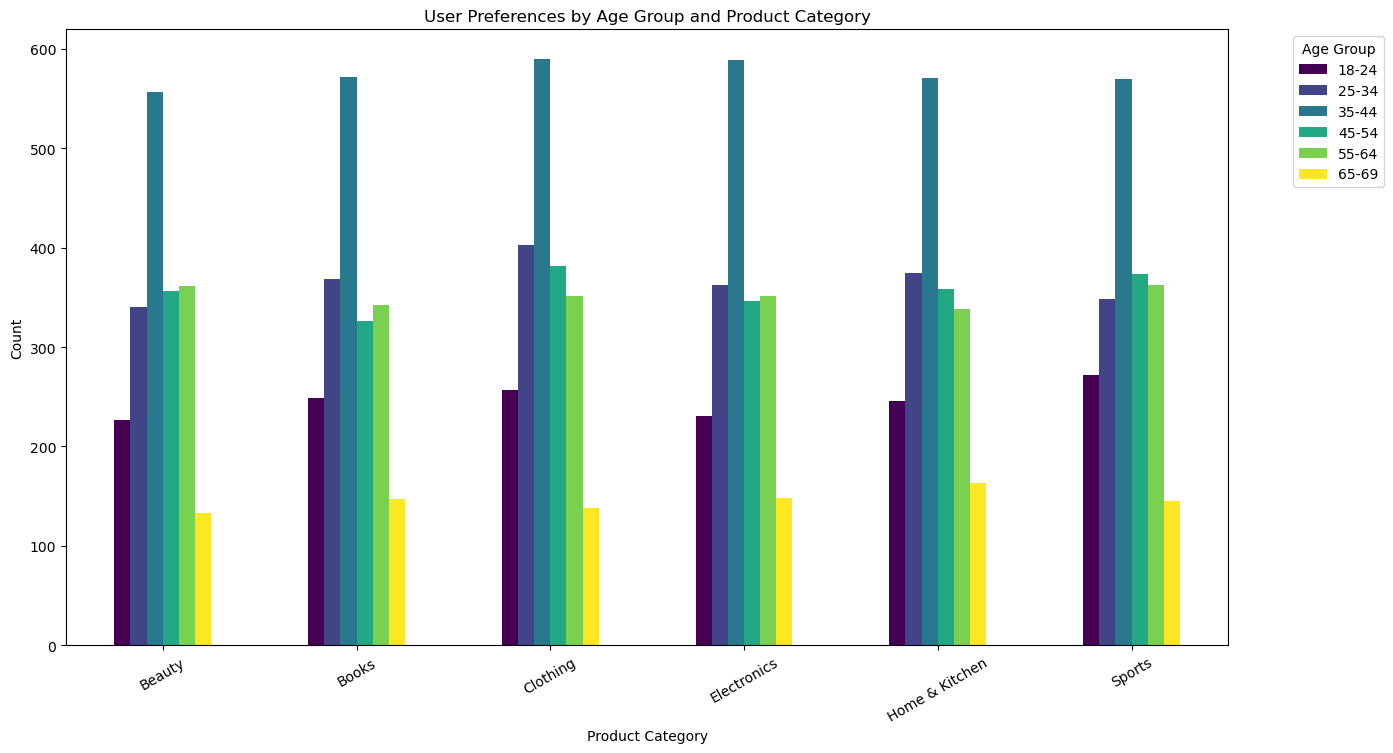

In [132]:
# Tạo các khoảng tuổi
bins = [18, 25, 35, 45, 55, 65, 69]  # Xác định các khoảng tuổi
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-69']  # Đặt tên cho các khoảng tuổi

# Thêm cột 'Age Group' vào dataframe dựa trên các khoảng tuổi
df_shopping['Age Group'] = pd.cut(df_shopping['Age'], bins=bins, labels=labels, right=False)
# Nhóm dữ liệu theo Age Group và Product Category để đếm số lượng
age_group_category_counts = df_shopping.groupby(['Product Category', 'Age Group']).size().unstack(fill_value=0)

# Vẽ biểu đồ grouped bar chart
age_group_category_counts.plot(kind='bar', figsize=(15, 8), colormap='viridis')

plt.title('User Preferences by Age Group and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




- Sản phẩm phổ biến:

  - Clothing và Electronics là hai sản phẩm có số lượng mua cao nhất ở nhiều nhóm tuổi, đặc biệt là nhóm tuổi 35-44.
  - Beauty và Home & Kitchen có lượng mua tương đối đều ở nhiều độ tuổi
  - Sports có mức độ mua sắm thấp hơn so với các danh mục khác.

- Xu hướng theo độ tuổi:

  - Nhóm tuổi từ 25 đến 64 có số lượng mua hàng cao
  - Nhóm tuổi trên 64 có xu hướng giảm dần số lượng mua sắm, đặc biệt là trong các danh mục như Electronics và Sports.
  
**=> Độ tuổi từ 25 đến 64 có nhu cầu mua sắm cao nhất, đặc biệt với các sản phẩm Clothing và Electronics. Nhóm tuổi trên 64 có xu hướng mua sắm ít hơn.**

### Biểu đồ 3: Gender x Product Category - Thống kê sở thích danh mục theo giới tính 

<Figure size 1500x800 with 0 Axes>

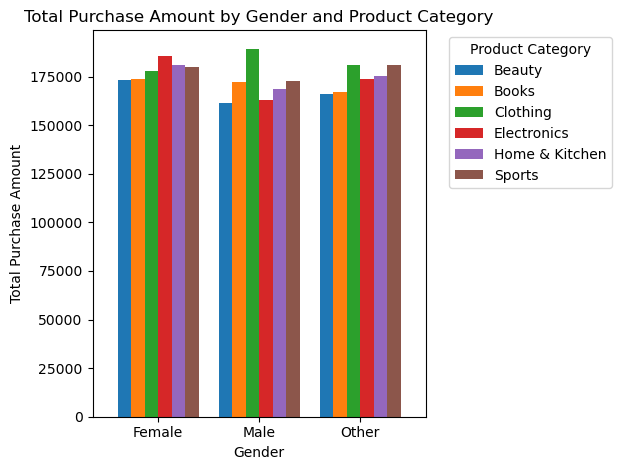

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu theo giới tính và danh mục sản phẩm, tính tổng chi tiêu
gender_category_purchase = df_shopping.groupby(['Gender', 'Product Category'])['Purchase Amount'].sum().unstack()

# Vẽ biểu đồ 
plt.figure(figsize=(15, 8))
gender_category_purchase.plot(kind='bar', width=0.8)

plt.title('Total Purchase Amount by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



- **Khách hàng nữ chi tiêu cao nhất:** Nhóm khách hàng nữ có tổng số tiền mua hàng cao nhất so với hai nhóm còn lại. Điều này cho thấy phụ nữ có xu hướng chi tiêu nhiều hơn cho việc mua sắm.
- **Khách hàng nam xếp thứ hai:** Nhóm khách hàng nam có tổng số tiền mua hàng xếp thứ hai. Mức chi tiêu của nam giới cũng khá cao.
- **Khách hàng thuộc nhóm "Other" chi tiêu tương đương nam giới:** Nhóm khách hàng "Other" có tổng số tiền mua hàng tương đương với nhóm khách hàng nam, cho thấy nhóm này cũng có đóng góp đáng kể vào tổng doanh thu.
- **Nhìn chung các giới tính có mức tiêu dùng gần bằng nhau => giới tính không ảnh hưởng nhiều đến mức chi tiêu**

### Biểu đồ 4: Gender x Purchase Amount - Thống kê số tiền người dùng chi tiêu theo độ tuổi

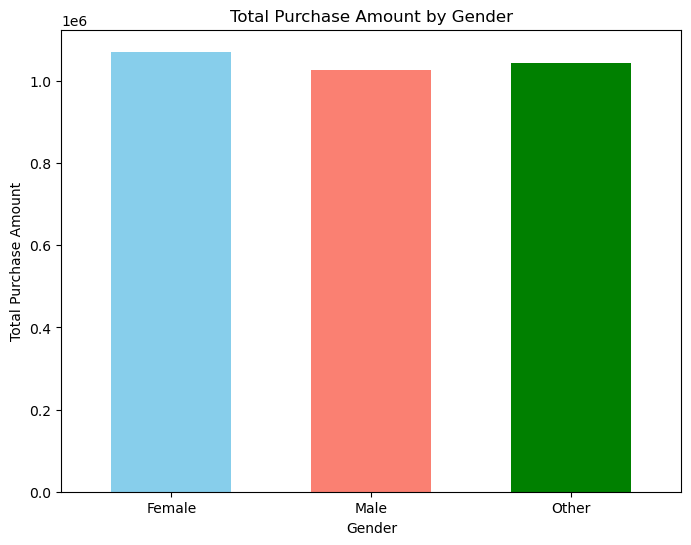

In [134]:
import matplotlib.pyplot as plt

# Nhóm dữ liệu theo giới tính và tính tổng chi tiêu
gender_purchase = df_shopping.groupby('Gender')['Purchase Amount'].sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
gender_purchase.plot(kind='bar', color=['skyblue', 'salmon', 'green'], width=0.6)
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)
plt.show()


- Clothing là danh mục có sức hút lớn nhất, đặc biệt với nhóm Male.
- Beauty thu hút nhóm Female, Electronics thu hút nhóm Female và Other.
- Các danh mục Books, Home & Kitchen, và Sports có mức độ yêu thích khá đồng đều giữa các giới tính.

### Biểu đồ 5: Country x Purchase Amount - Thống kê số tiền người dùng chi tiêu theo thành phố

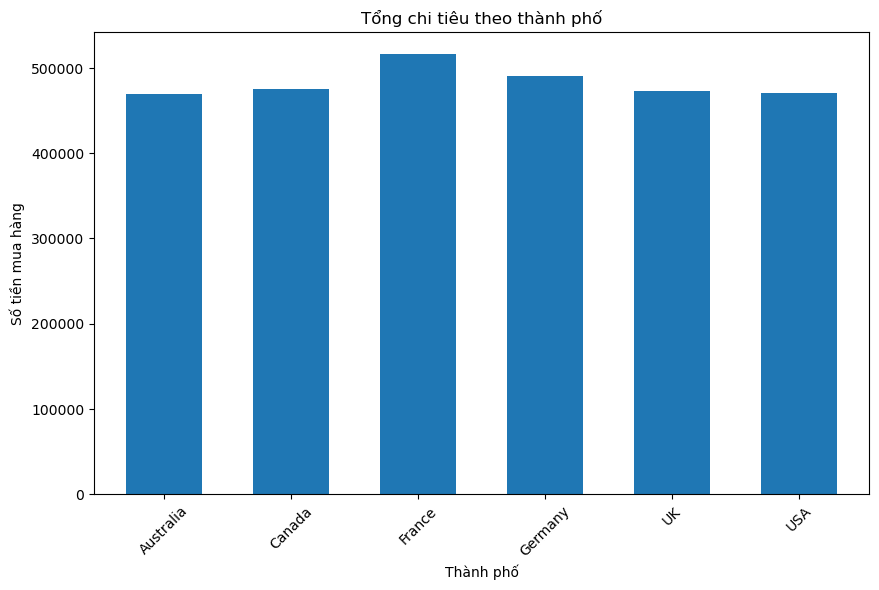

In [135]:
# Nhóm dữ liệu theo thành phố và tính tổng số tiền mua hàng
df_country_purchase = df_shopping.groupby('Country')['Purchase Amount'].sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
df_country_purchase.plot(kind='bar', width=0.6)
plt.title('Tổng chi tiêu theo thành phố')
plt.xlabel('Thành phố')
plt.ylabel('Số tiền mua hàng')
plt.xticks(rotation=45)  # Xoay nhãn thành phố nếu quá dài
plt.show()


- France có mức tiêu dùng cao nhất trong số các thành phố được khảo sát
- Australia, Canada, Germany, UK, USA có mức tiêu dùng tương đối gần nhau và đều ở mức cao
- Không có thành phố nào có mức tiêu dùng quá thấp so với các thành phố còn lại

### Biểu đồ 6: Country x Product Category - Thống kê danh mục sở thích của các khu cực thành phố

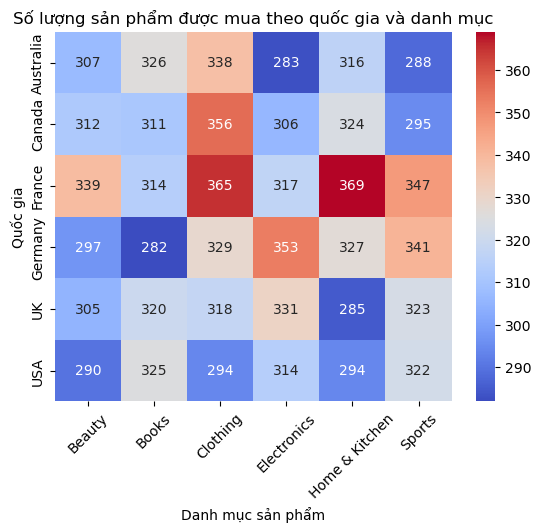

In [136]:

# Nhóm dữ liệu theo quốc gia và danh mục sản phẩm, đếm số lượng giao dịch qua bảng tần số chéo
df_country_product = pd.crosstab(df_shopping['Country'], df_shopping['Product Category']) #(qua bảng tần số chéo)
# Vẽ biểu đồ nhiệt
sns.heatmap(df_country_product, annot=True, fmt="d", cmap="coolwarm")
plt.title('Số lượng sản phẩm được mua theo quốc gia và danh mục')
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Quốc gia')
plt.xticks(rotation=45)  # Xoay nhãn 
plt.show()

- **Theo quốc gia:**

  - France: Có vẻ như France có mức tiêu thụ sản phẩm khá cao, đặc biệt là ở các danh mục như   Electronics và Home & Kitchen.
  - Germany: Cũng có mức tiêu thụ khá cao, đặc biệt là ở các danh mục như Clothing và Electronics.
  - Các quốc gia còn lại: Mức tiêu thụ tương đối đồng đều, không có sự chênh lệch quá lớn.
- **Theo danh mục sản phẩm:**

  - Electronics: Là danh mục được nhiều quốc gia ưa chuộng.
  - Home & Kitchen: Cũng là một danh mục phổ biến.
  - Beauty: Mức tiêu thụ có sự khác biệt lớn giữa các quốc gia.

---

### Biểu đồ 7: Purchase Amount x Purchase Date -  Thống kê chi tiêu theo ngày

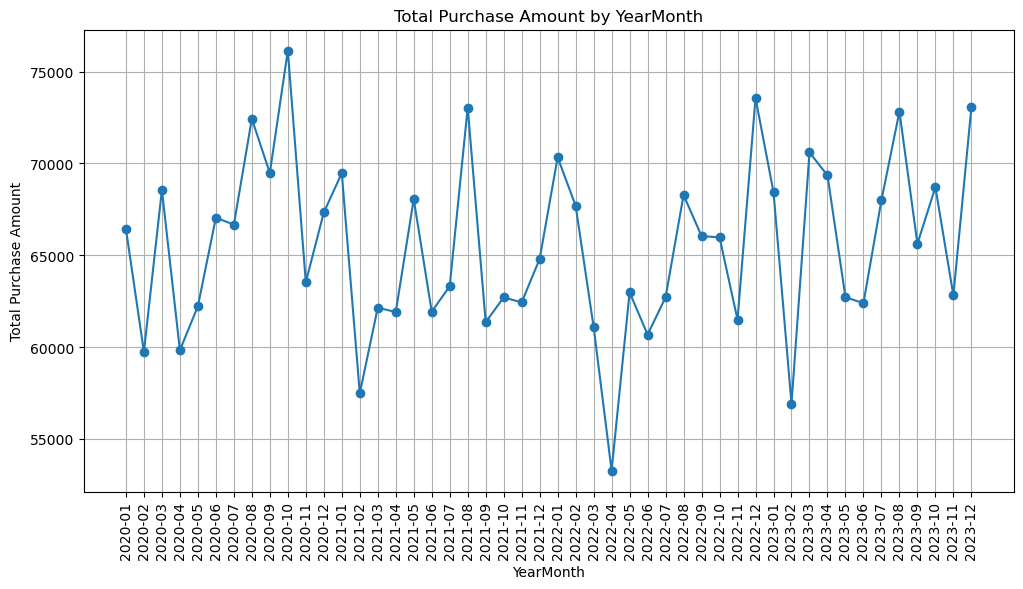

In [137]:
#Chuyển định dạng
df_shopping['YearMonth'] = df_shopping['Purchase Date'].dt.strftime('%Y-%m')

#Vẽ biểu đồ đường thể hiện số tiền bỏ ra để mua sản phẩm theo YearMonth
amount_date =  df_shopping.groupby('YearMonth')['Purchase Amount'].sum()
plt.figure(figsize=(12,6))
plt.plot(amount_date.index, amount_date.values, marker='o')
plt.title('Total Purchase Amount by YearMonth')
plt.ylabel('Total Purchase Amount')
plt.xlabel('YearMonth')
plt.xticks(rotation=90)
plt.grid()

Nhận xét: 
+ Vào khoảng thời gian tháng Hai đến tháng Tư hàng năm thì chi tiêu mua hàng giảm mạnh
+ Vào khoảng thời gian cuối năm thì nhu cầu mua sắm tăng

### Biểu đồ 8: Product Category x Purchase Amount x Gender - Thống kê danh mục chi tiêu theo giới tính - Biểu đồ cột

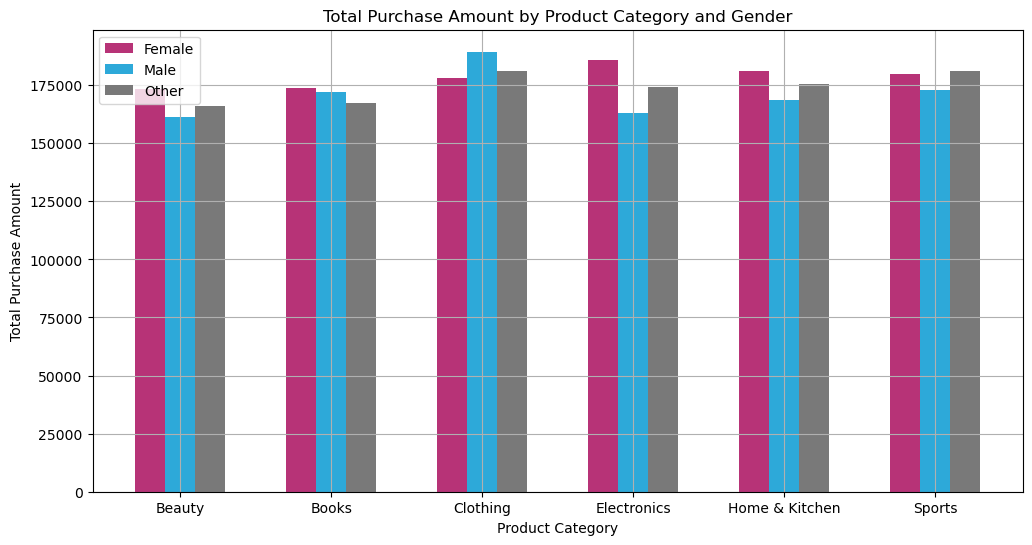

In [138]:
#Vẽ biểu đồ cột thể hiện chi tiêu sản phẩm theo Product Category và Gender
df_amount_category_gender = df_shopping.groupby(['Product Category','Gender'])['Purchase Amount'].sum().unstack()
df_amount_category_gender

x = np.arange(len(df_amount_category_gender.index))

Female = df_amount_category_gender["Female"]
Male = df_amount_category_gender["Male"]
Other = df_amount_category_gender["Other"]

plt.figure(figsize=(12,6))
plt.bar(x - 0.2, Female, width=0.2, label="Female", color='#b73377')
plt.bar(x,       Male,   width=0.2, label="Male", color='#2da9d9')
plt.bar(x + 0.2, Other,  width=0.2, label="Other", color='#797979')


plt.title('Total Purchase Amount by Product Category and Gender')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Product Category')
plt.xticks(x, df_amount_category_gender.index)
plt.grid()
plt.legend()



Nhận xét:
+ Ngành hàng Quần áo được tất cả các giới tính mua nhiều nhất
+ Giới tính Male chi nhiều tiền nhất cho Clothing và ít nhất cho Beauty và Electronics
+ Giới tính Female chi nhiều tiền nhất cho Electronics, Home & Kitchen và Sports

### Biểu đồ 9: Purchase Date x Product Category x Purchase Amount - Thống kê danh mục sở thích theo thời gian - Biểu đồ đường

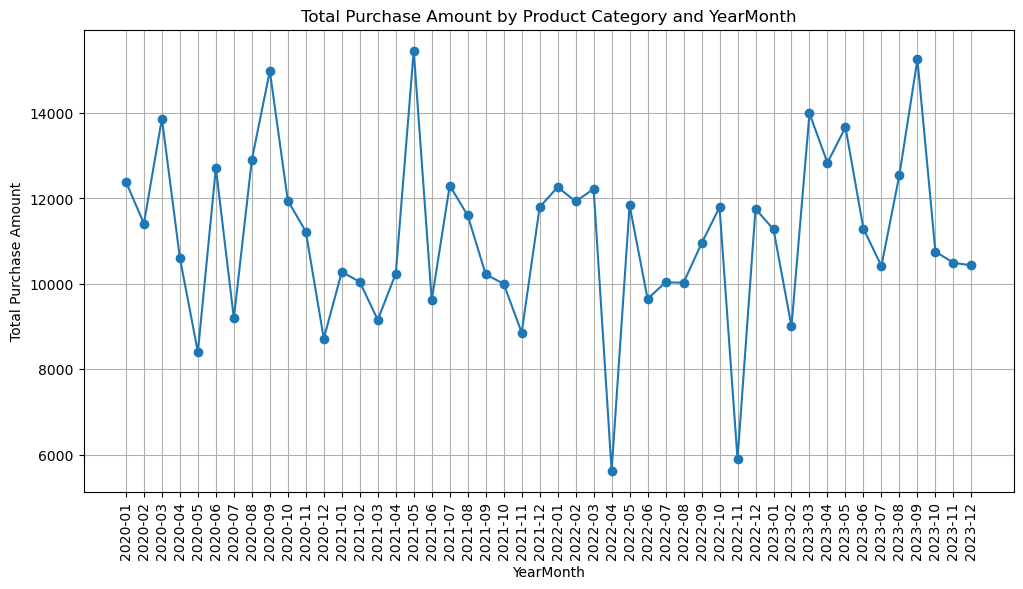

In [139]:
#Vẽ biểu đồ đường thể hiện số tiền bỏ ra để mua sản phẩm theo theo Product Category và Purchase Date
df_amount_category_date = df_shopping.groupby(['YearMonth','Product Category'])['Purchase Amount'].sum().unstack()
df_amount_category_date

Sports = df_amount_category_date["Sports"]
Electronics = df_amount_category_date["Electronics"]
Clothing = df_amount_category_date["Clothing"]
Home_Kitchen = df_amount_category_date["Home & Kitchen"]
Beauty = df_amount_category_date["Beauty"]
Books = df_amount_category_date["Books"]

plt.figure(figsize=(12,6))
plt.plot(Sports.index, Sports.values, marker='o', label='Sports')
# plt.plot(Electronics.index, Electronics.values, marker='o', label='Electronics')
# plt.plot(Clothing.index, Clothing.values, marker='o', label='Clothing')
# plt.plot(Home_Kitchen.index, Home_Kitchen.values, marker='o', label='Home & Kitchen')
# plt.plot(Beauty.index, Beauty.values, marker='o', label='Beauty')
# plt.plot(Books.index, Books.values, marker='o', label='Books')


plt.title('Total Purchase Amount by Product Category and YearMonth')
plt.ylabel('Total Purchase Amount')
plt.xlabel('YearMonth')
plt.xticks(rotation=90)
plt.grid()
